In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import tensorflow as tf

In [11]:
from number_recognition import NumberRecognizer

image process

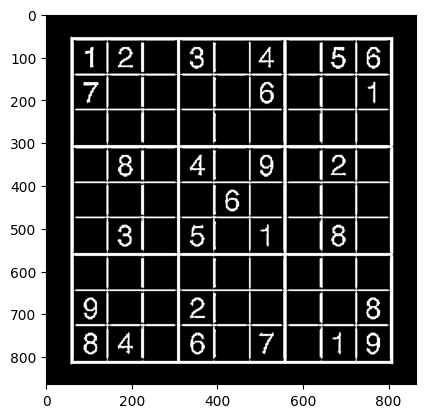

In [2]:
# reduced pixel size 
pixel_size=240
higher_pixel_size=96*9
multiplying_factor=higher_pixel_size/pixel_size

#image load
image = cv2.imread('images.png',cv2.IMREAD_GRAYSCALE)

#original copy
image_org=image.copy()

#resize image with reduced pixel
image=cv2.resize(image,[pixel_size,pixel_size])

#original image with high quality
image_org=cv2.resize(image_org,[higher_pixel_size,higher_pixel_size])
image_org=cv2.adaptiveThreshold(image_org,255,1,1,11,2)

#gausion blur
image=cv2.GaussianBlur(image,(5,5),1)

#bit image
image_threshhold=cv2.adaptiveThreshold(image,255,1,1,11,2)
plt.imshow(image_org,cmap='gray')
# plt.show()
# plt.imshow(image_threshhold,cmap='binary')


contours finding

In [3]:
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(image_threshhold,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  
#edge


finding sudoku contour

In [4]:
max=0
for i in contours:
    if(cv2.contourArea(i)>50):
        peri=cv2.arcLength(i,True)
        approx=cv2.approxPolyDP(i,0.02*peri,True)
        if(len(approx)==4):
            if(cv2.contourArea(approx)>max):
                bigcontour=approx
                
bigcontour=bigcontour.T


draw contours

In [5]:
# Draw all contours
# -1 signifies drawing all contours
image2=image.copy()
cv2.drawContours(image2, contours, -1, (0, 255, 0), 1)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

plot sudoku contours


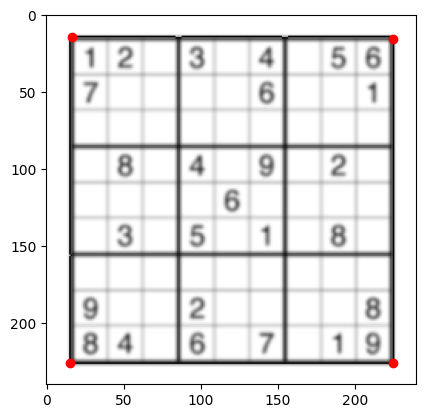

In [6]:
plt.imshow(image2,cmap='gray')
plt.scatter(bigcontour[0],bigcontour[1],color='r')


reorder corner points

In [7]:
bigcontour_trans=np.array([bigcontour[0][0],bigcontour[1][0]])
bigcontour=bigcontour_trans.T

sortx=np.sort(bigcontour_trans[0])
p1=np.array([-1,-1])
p2=np.array([-1,-1])
p3=np.array([-1,-1])
p4=np.array([-1,-1])
for i in range(4):
    if (bigcontour[i][0]==sortx[0] and p1[0]==-1):
        p1=bigcontour[i]
    elif (bigcontour[i][0]==sortx[1] and p2[0]==-1):
        p2=bigcontour[i]
    elif (bigcontour[i][0]==sortx[2] and p3[0]==-1):
        p3=bigcontour[i]
    else:
        p4=bigcontour[i]
if p1[1]>p2[1]:
    p2,p1=p1,p2
if p3[1]<p4[1]:
    p3,p4=p4,p3
points=np.array([p1,p2,p3,p4])

wrap image

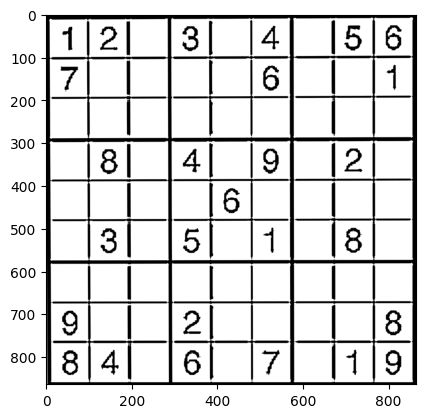

In [8]:
pts1 = np.float32(points*multiplying_factor)
pts2 = np.float32([[0, 0], [0, higher_pixel_size],[higher_pixel_size, higher_pixel_size],[higher_pixel_size, 0]])
     
# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)
sudoku_img_bit= cv2.warpPerspective(image_org, matrix, (higher_pixel_size, higher_pixel_size))

# #bit image of sudoku
# sudoku_img_bit=cv2.adaptiveThreshold(sudoku_img,255,1,1,11,2)

# Wrap the transformed image
# plt.imshow(image_org,cmap='gray') # Initial Capture
# plt.show()
# plt.imshow(sudoku_img,cmap='gray')
# plt.show()
plt.imshow(sudoku_img_bit,cmap='binary')

In [9]:
# pts1 = np.float32(points)
# pts2 = np.float32([[0, 0], [0, pixel_size],[pixel_size, pixel_size],[pixel_size, 0]])
     
# # Apply Perspective Transform Algorithm
# matrix = cv2.getPerspectiveTransform(pts1, pts2)
# result = cv2.warpPerspective(image, matrix, (pixel_size, pixel_size))
    
# # Wrap the transformed image
# plt.imshow(image_org,cmap='gray') # Initial Capture
# plt.show()
# plt.imshow(result,cmap='gray')

image split

In [12]:

sudoku_img_vsplit=np.vsplit(sudoku_img_bit,9)
sudoku_img_vhsplit=[]
for i in range(9):
    sudoku_img_vhsplit.append(np.hsplit(sudoku_img_vsplit[i],9))

In [14]:
n = NumberRecognizer()

n.init() # create a model
n.load() # load the model


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2677 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1089 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0726 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0542 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0312 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0170 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.016

(0.09935754537582397, 0.9761999845504761)

In [32]:

# for i in range(9):
#     for j in range(9):
#         img=sudoku_img_vhsplit[0][0]
#         img=cv2.resize(img,[28,28])
#         cv2.imwrite("grids/01.png",img)
#         num=n.recognize("grids/01.png")
        

1/1 [==============================] - 0s 27ms/step
3


modal load

In [40]:
modal='digits_recognition_cnn.h5'
loaded_modal=tf.keras.models.load_model(modal,compile=False)

output block

In [41]:
output=np.array([-1])
output=np.resize(output,[9,9])

no prediction

In [42]:
thresh=10*255
for row in range(9):
    for column in range(9):
        sudoku_img_vhsplit[row][column]=cv2.resize(sudoku_img_vhsplit[row][column],(28,28))
        block=sudoku_img_vhsplit[row][column][8:20, 8:20]
        if(np.sum(block)<thresh):
            output[row][column]=0
        else:
            predict=loaded_modal.predict(np.array([sudoku_img_vhsplit[row][column]]))
            predict=np.argmax(predict)
            output[row][column]=predict

            # img=sudoku_img_vhsplit[row][column]
            # cv2.imwrite("grids/01.png",img)
            # output[row][column]=n.recognize("grids/01.png")



1/1 [==============================] - 0s 13ms/step


In [43]:
print(output)

[[7 2 0 3 0 2 0 5 8]
 [7 0 0 0 0 6 0 0 2]
 [0 0 0 0 0 0 0 0 0]
 [0 8 0 2 0 8 0 2 0]
 [0 0 0 0 6 0 0 0 0]
 [0 3 0 5 0 1 0 8 0]
 [0 0 0 0 0 0 0 0 0]
 [8 0 0 2 0 0 0 0 8]
 [8 4 0 6 0 7 0 1 9]]


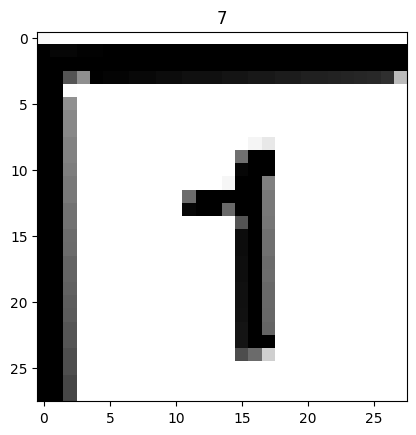

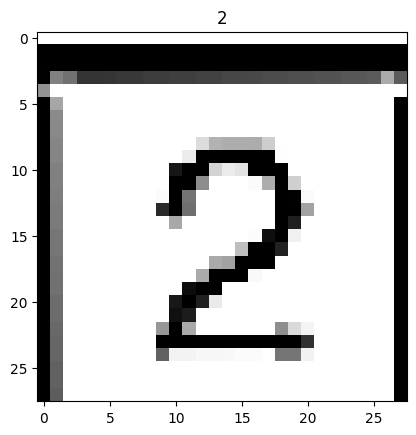

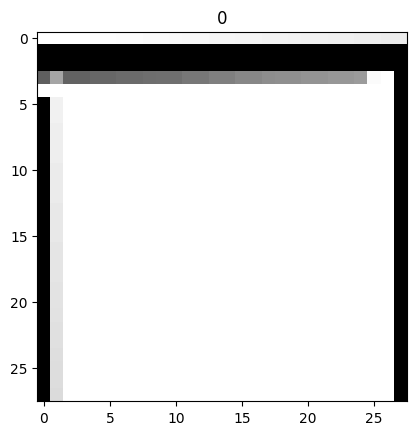

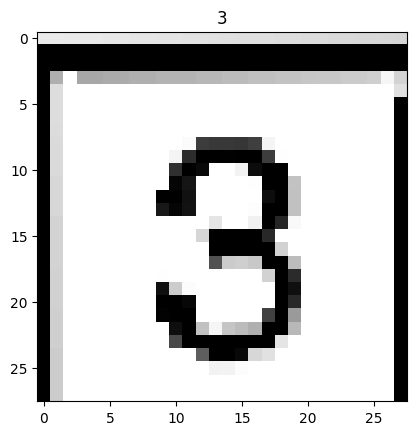

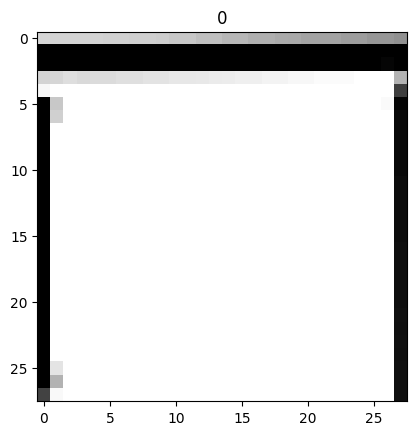

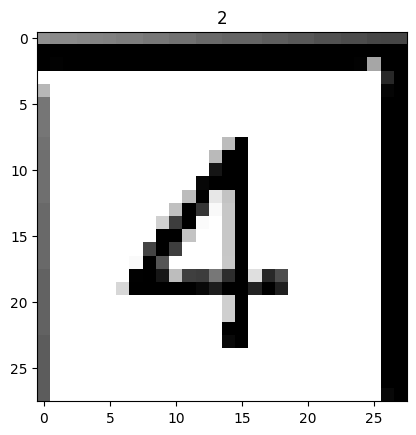

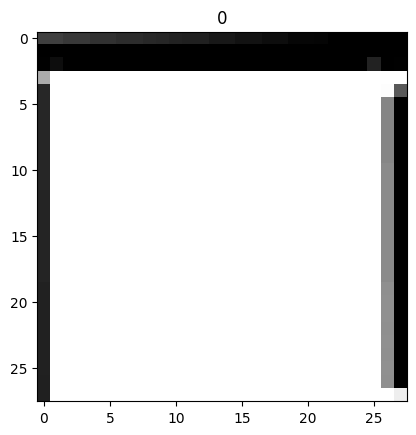

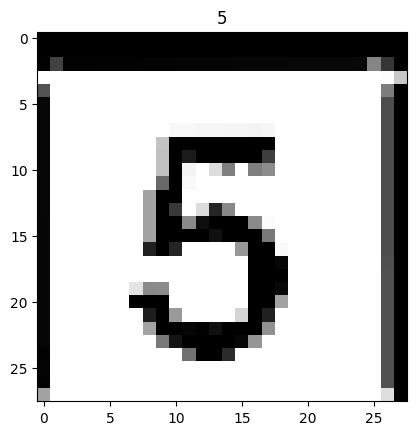

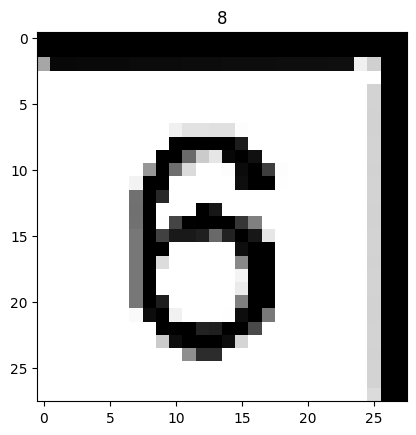

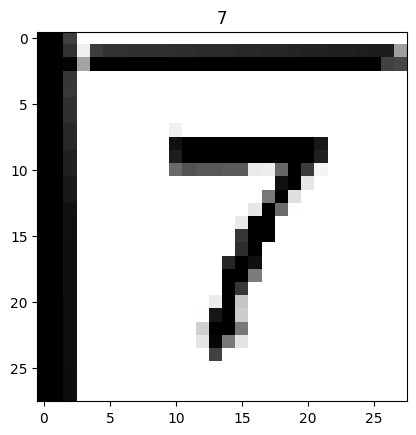

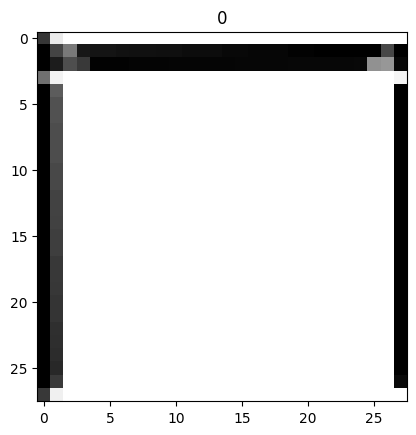

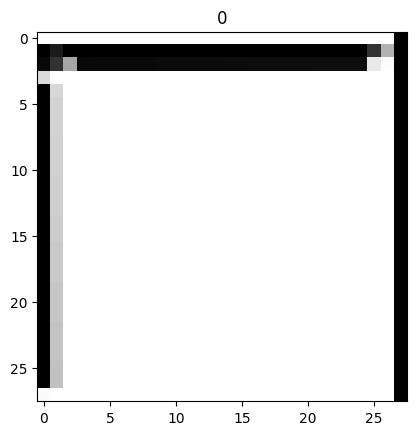

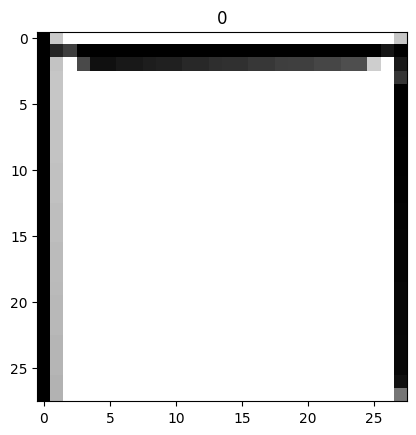

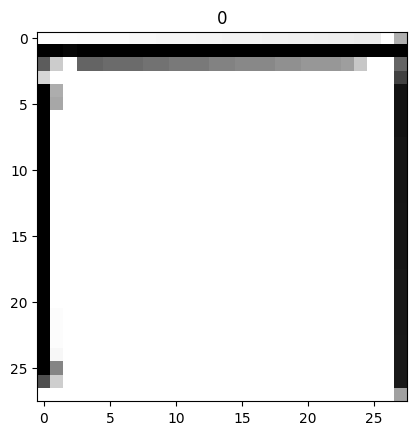

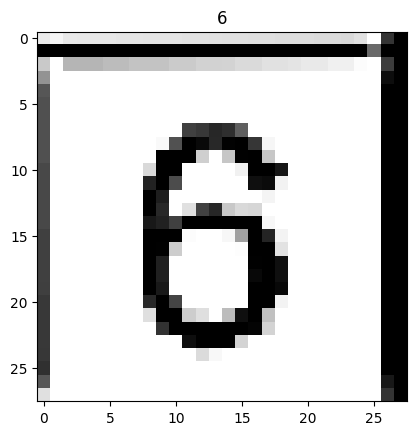

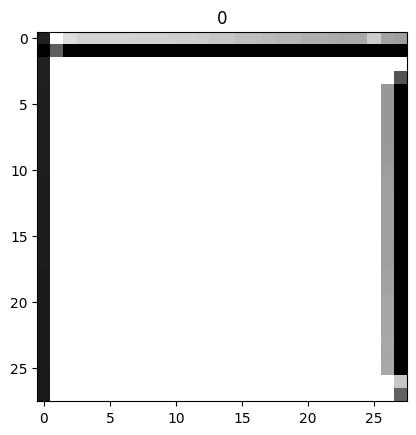

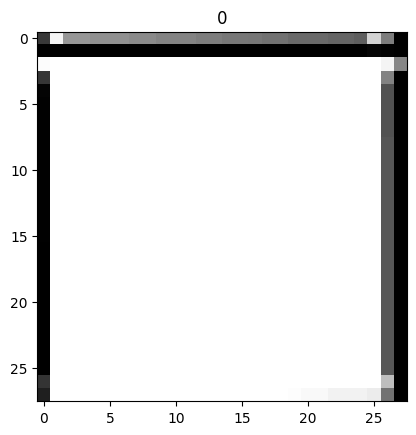

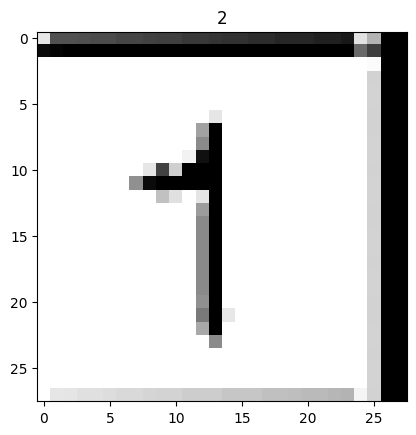

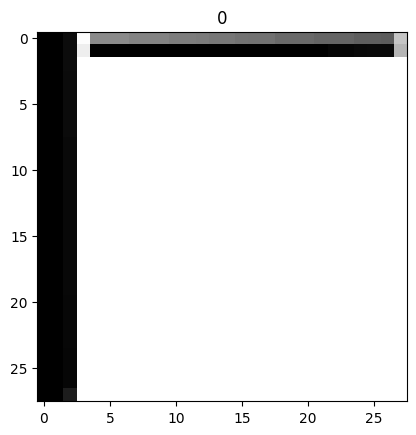

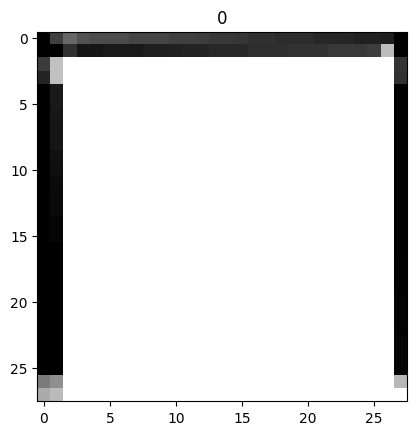

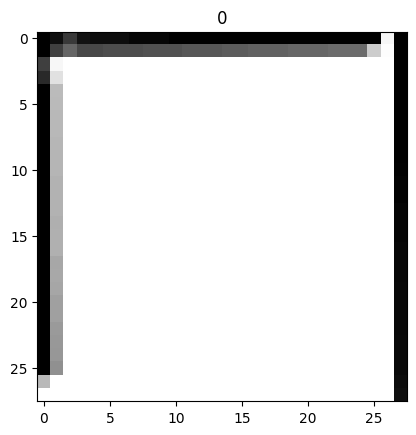

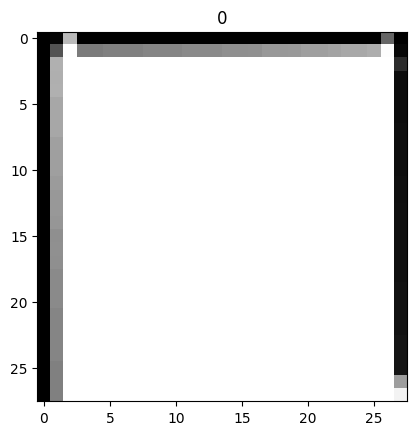

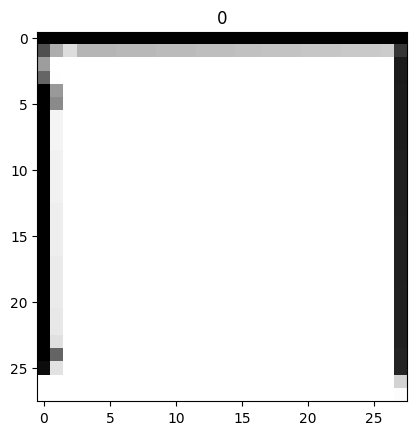

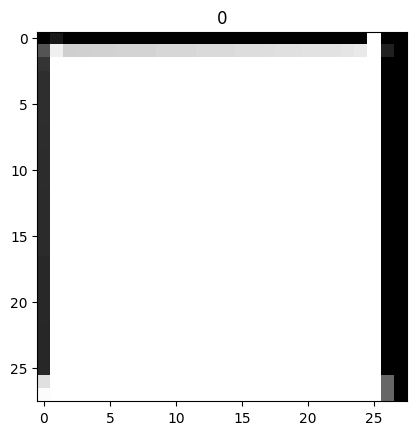

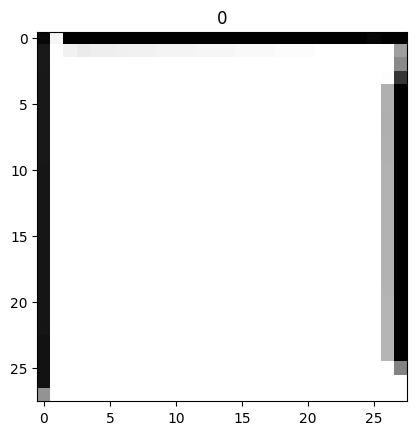

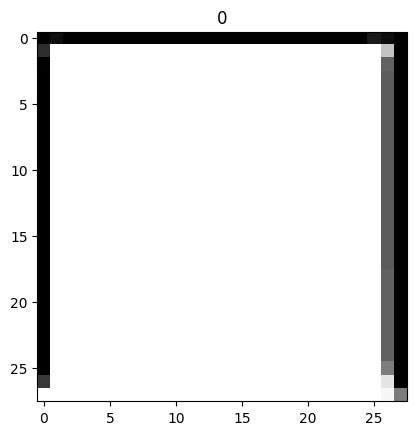

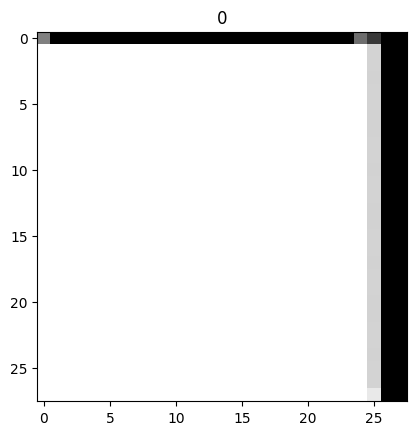

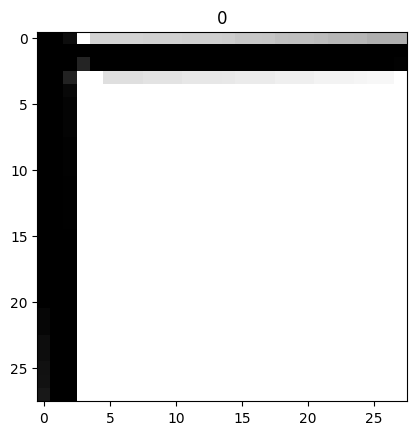

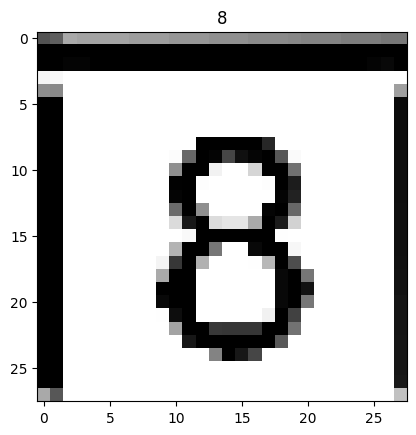

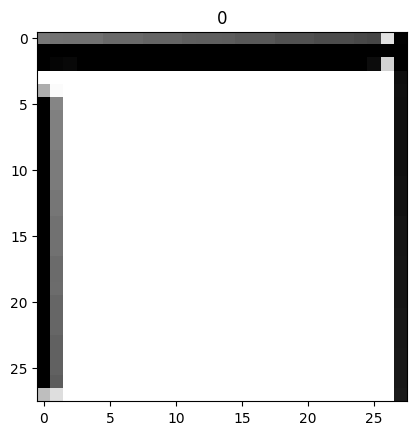

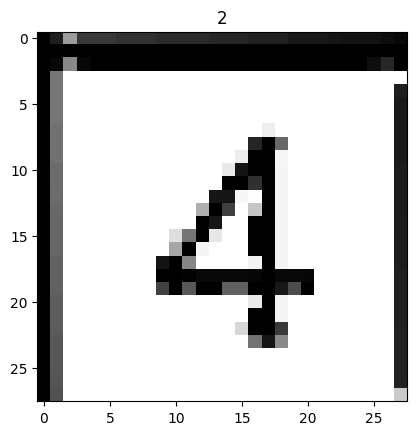

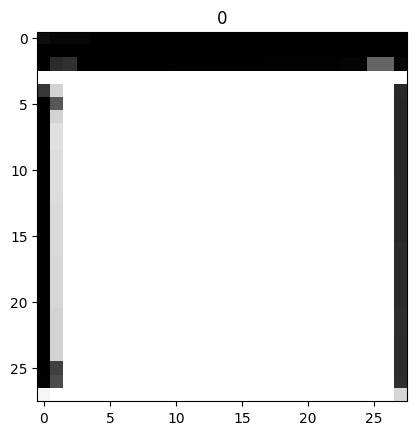

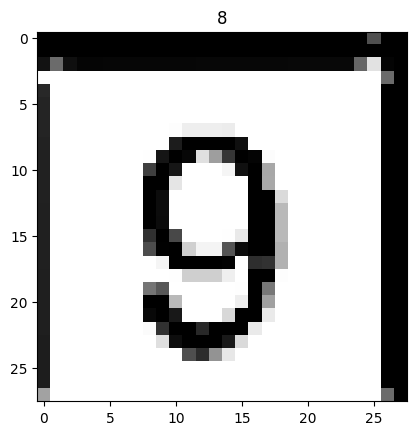

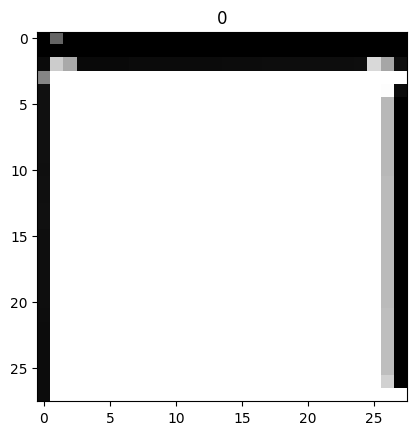

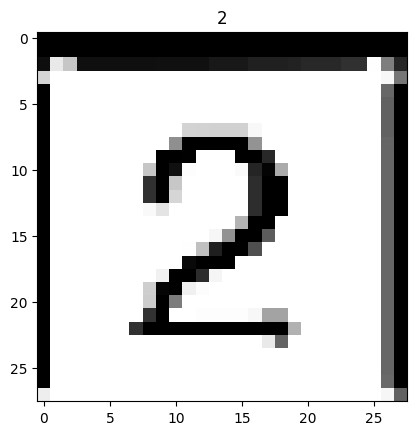

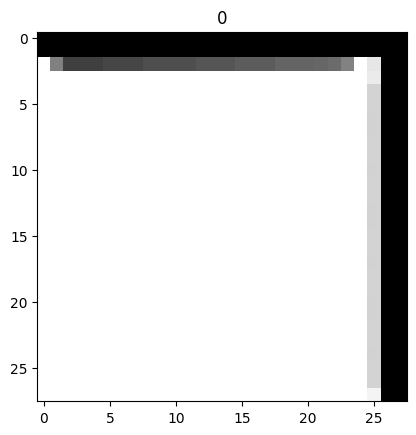

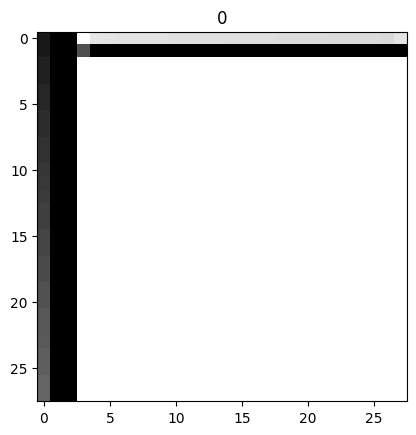

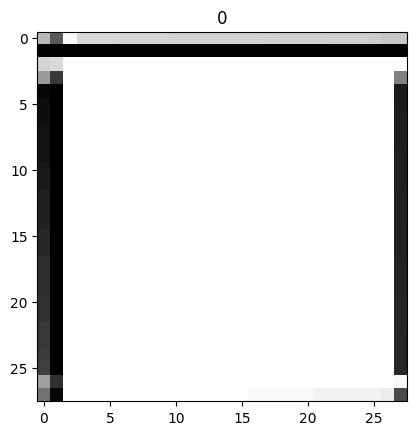

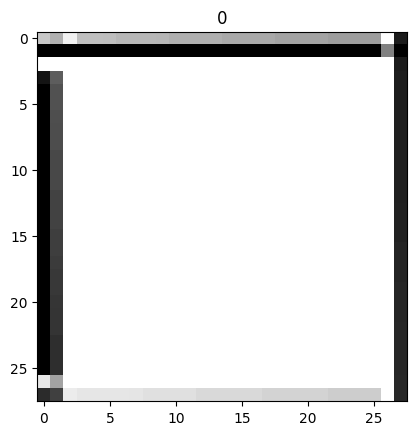

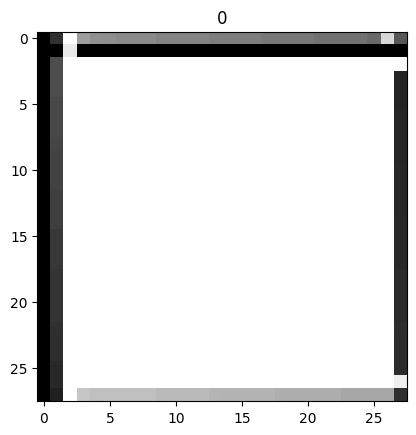

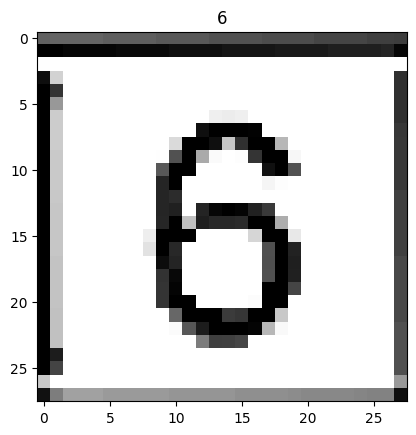

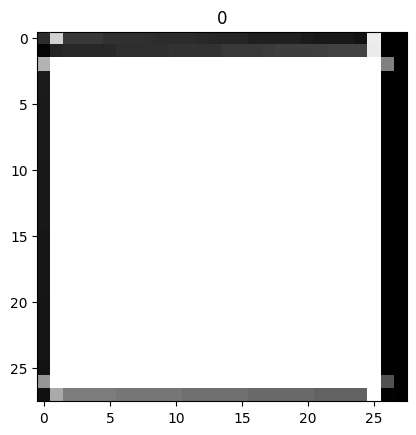

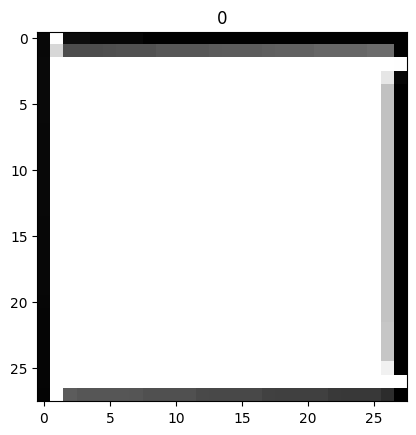

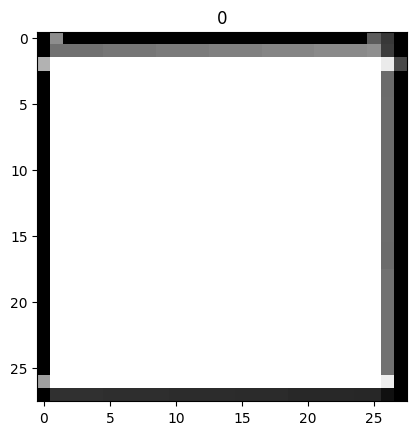

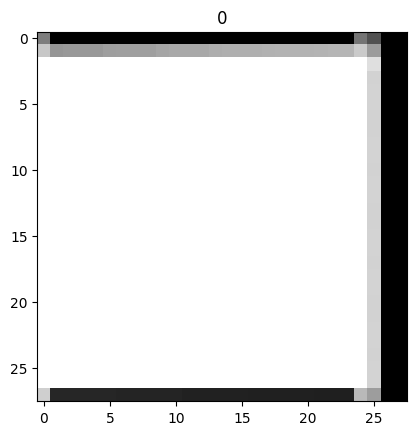

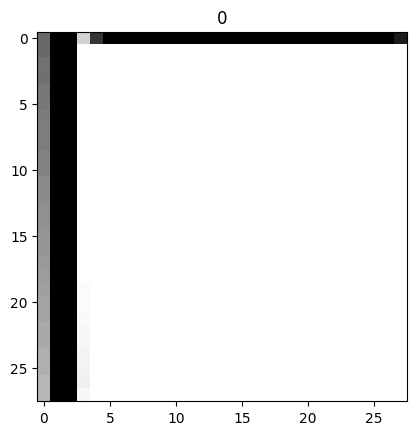

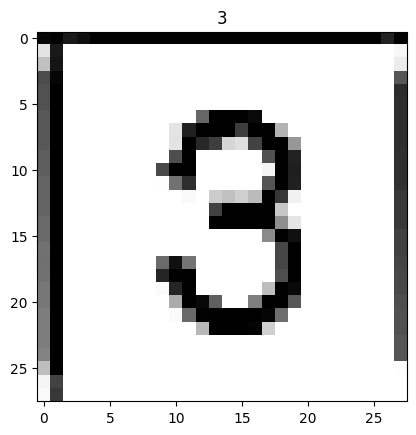

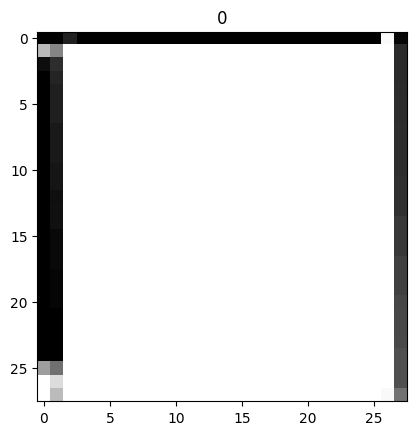

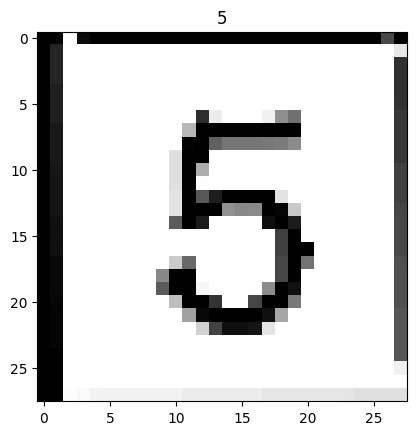

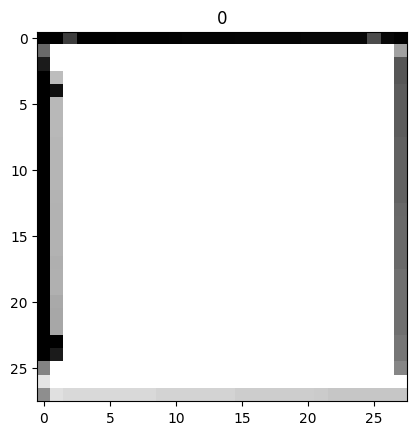

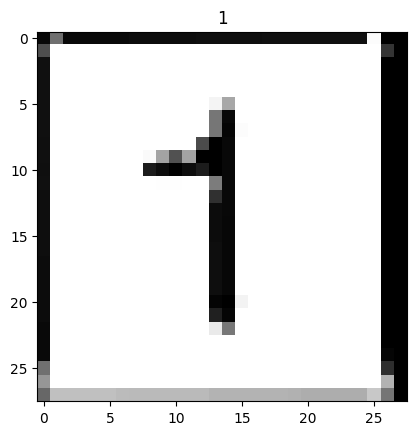

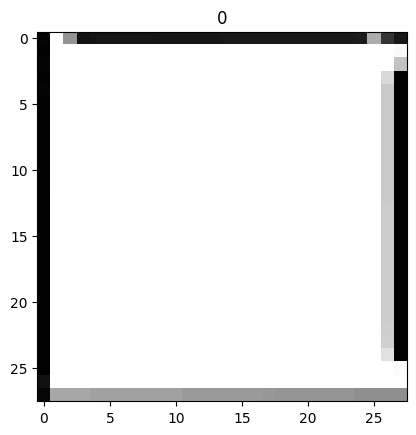

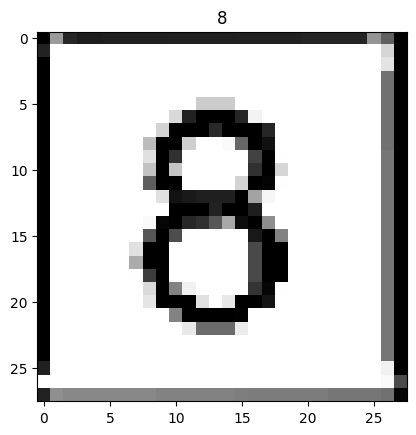

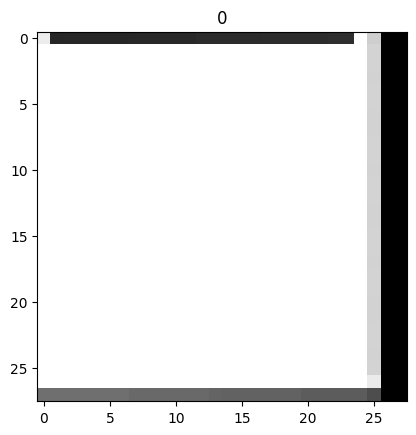

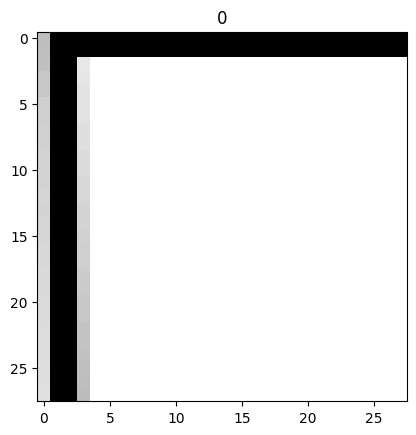

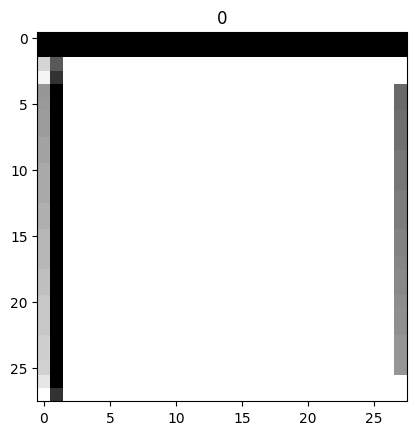

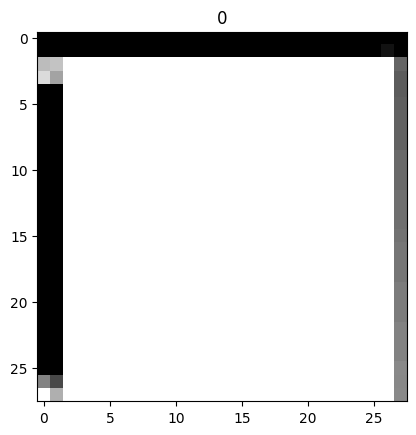

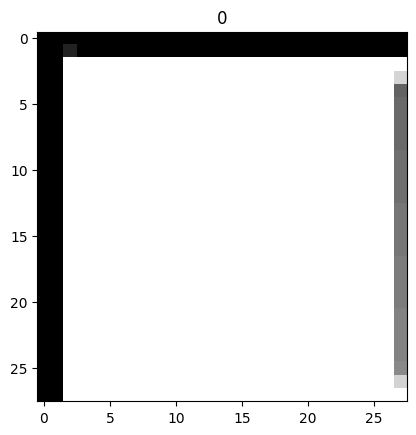

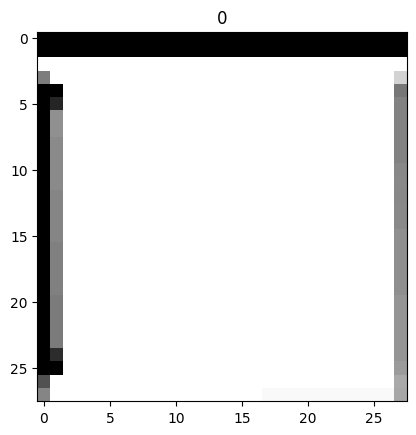

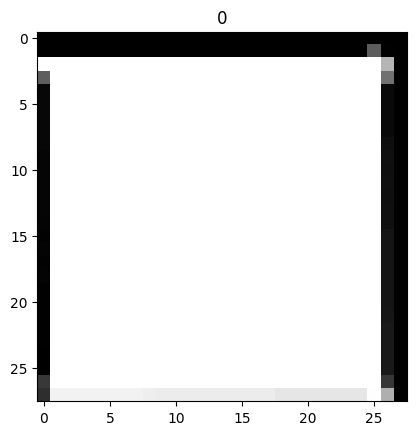

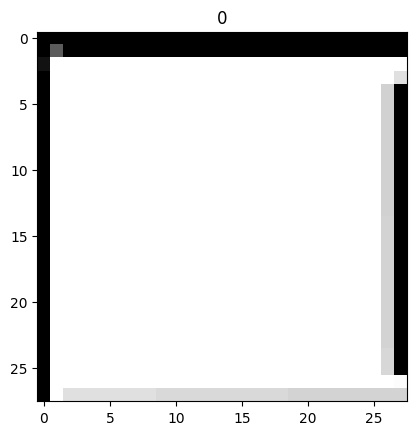

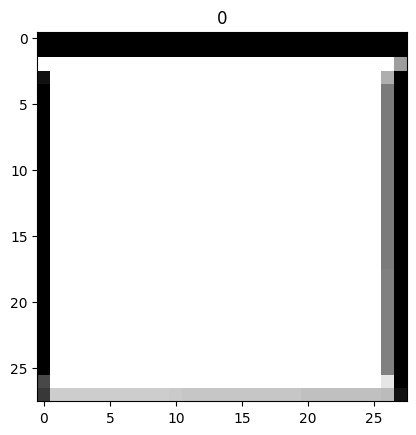

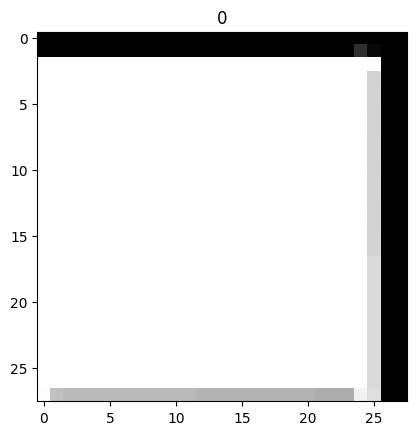

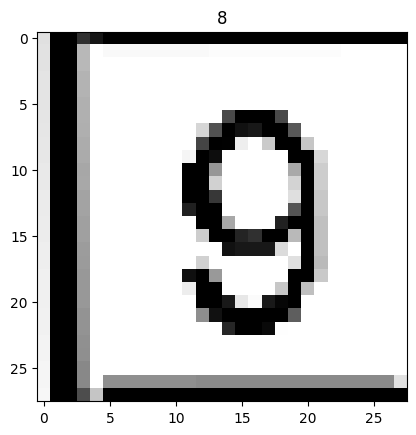

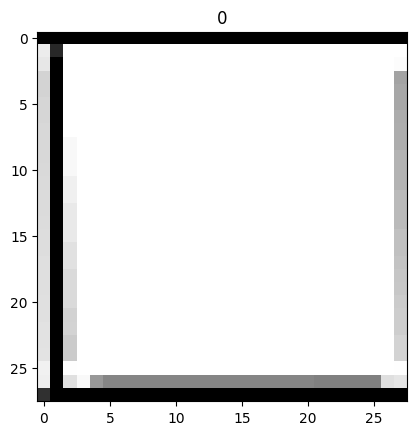

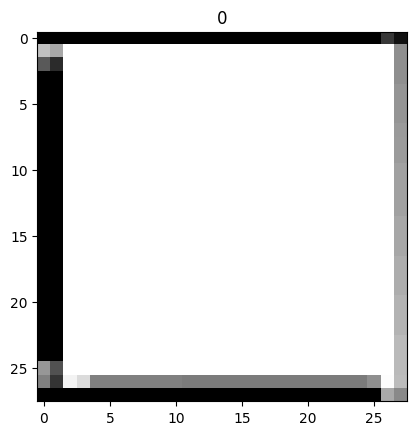

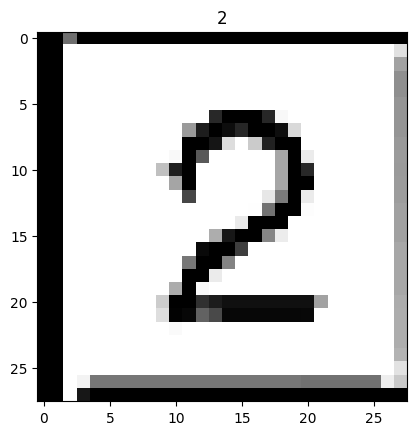

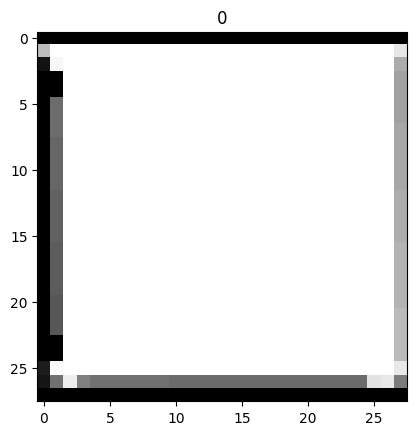

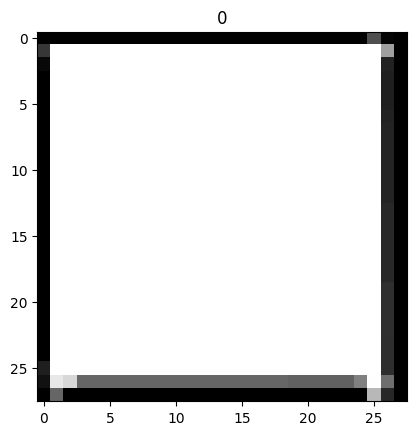

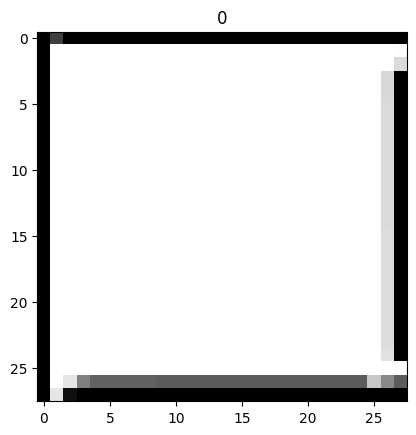

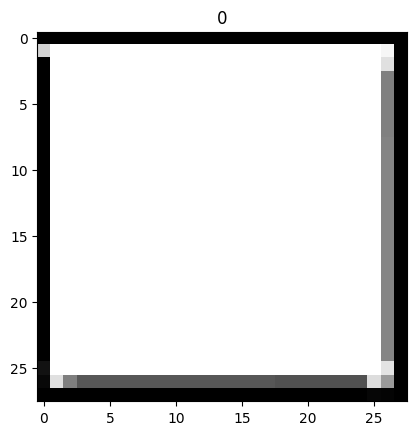

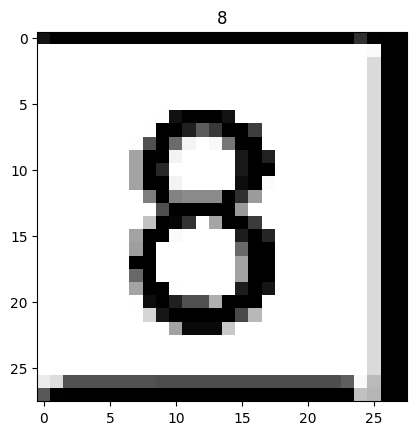

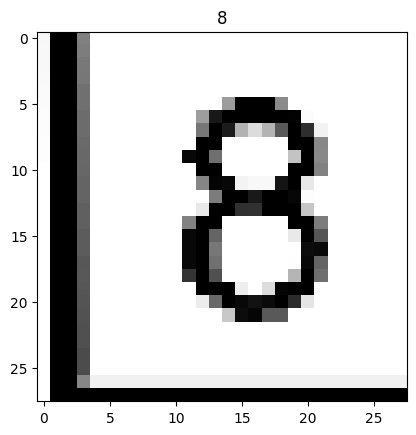

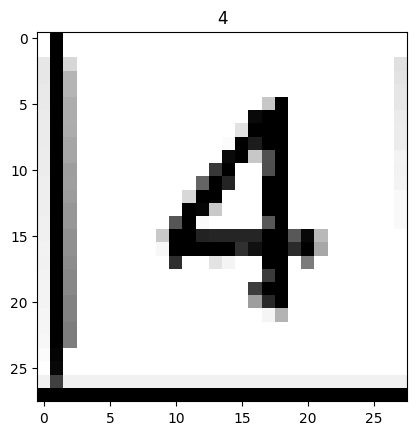

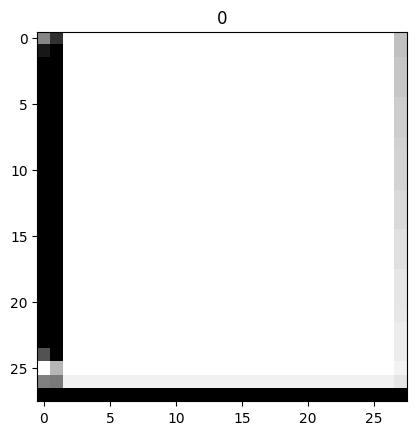

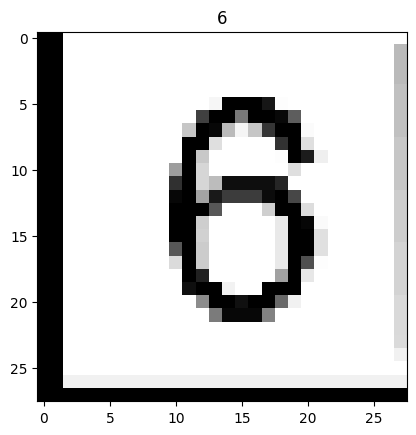

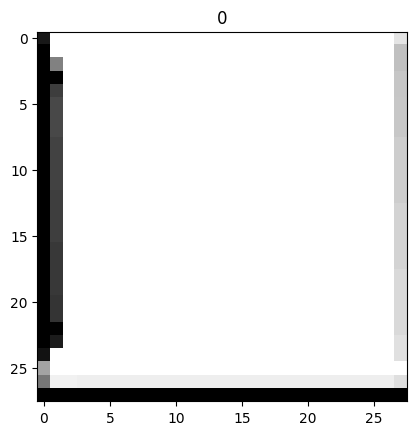

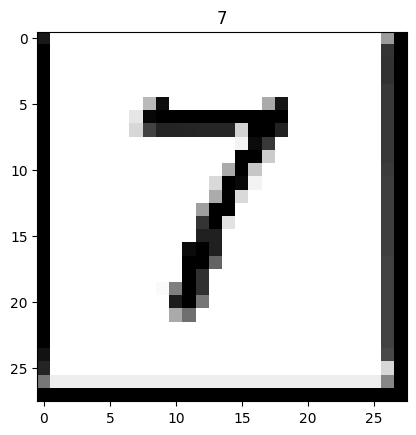

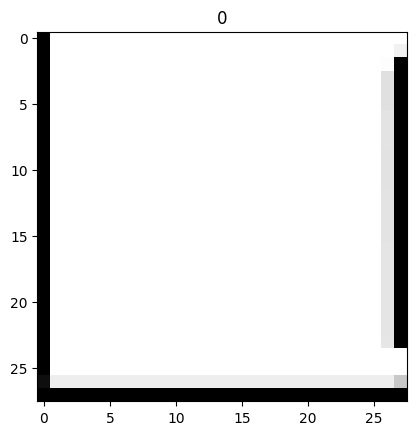

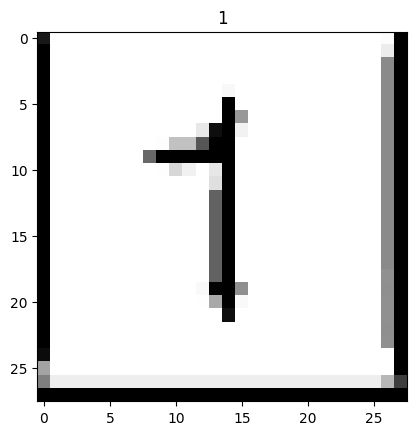

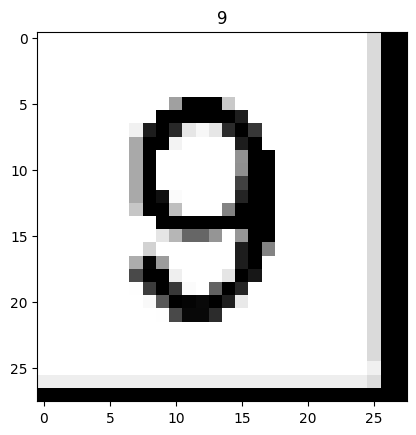

In [ ]:
for i in range(9):
    for j in range(9):
        plt.imshow(sudoku_img_vhsplit[i][j],cmap='binary')
        plt.title(output[i][j])
        plt.show()